Business requirment 5000 songs

# Ways to find the right number of cluster, using inertia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the date frame and checking the content

moosic_5000songs = pd.read_csv("df_audio_features_5000_cleaned_whitespaces.csv")
moosic_5000songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


# Cleaning and scaling data frame

In [3]:
# Drop multiple columns, cleaning the date frame from the not relevant coloumns 'time_signature', 'id', 'html'

# Create the list of columns to drop

columns_to_drop = ['time_signature', 'id', 'html']

# Drop the specified columns and create a new DataFrame without them

moosic_5000songs = moosic_5000songs.drop(columns=columns_to_drop)
moosic_5000songs.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680


# Data scaling Transformers, Quantile transformer

Data scaling Transformers, Quantile transformer
Transformers change the distribution to more closely resemble a normal distribution. Data that conforms to the normal distribution in machine learning is advantageous for model construction since it simplifies the maths.

In [4]:
# First we will create exploration data frame with 2 data set

moosic_5000songs_scaled = moosic_5000songs[["energy","acousticness"]]
moosic_5000songs_scaled.head()

,energy,acousticness
0,0.2590,0.694
1,0.3990,0.217
2,0.7300,0.453
3,0.0502,0.879
4,0.1190,0.916


In [5]:
# Import Quantile Transformer
from sklearn.preprocessing import QuantileTransformer

# Create DataFrame of Quantile transformed values
moosic_5000songs_scaled_quantile = QuantileTransformer(n_quantiles=len(moosic_5000songs_scaled.iloc[:,-1])).fit_transform(moosic_5000songs_scaled)
with_age_quantile = pd.DataFrame(moosic_5000songs_scaled_quantile, columns=moosic_5000songs_scaled.columns, index=moosic_5000songs_scaled.index)

# Display age column of original DataFrame and age column of Quantile DataFrame to compare
pd.DataFrame({
    'original': moosic_5000songs_scaled.iloc[:,-1],
    'quantile_transformed': with_age_quantile.iloc[:,-1]
}).sort_values(by='original')

,original,quantile_transformed
3643,0.000,0.0
3414,0.000,0.0
3453,0.000,0.0
3849,0.000,0.0
3928,0.000,0.0
...,...,...
2097,0.996,1.0
2099,0.996,1.0
1928,0.996,1.0
1974,0.996,1.0


In [6]:
with_age_quantile.head()

,energy,acousticness
0,0.145969,0.791173
1,0.206916,0.610145
2,0.490638,0.717329
3,0.037830,0.864540
4,0.079862,0.883359


# K-means calculation

In [7]:
# K-means calculation

from sklearn.cluster import KMeans

# Based on the quick look to the scatter plot, 

# we are going to assume there can be 10 different genre.
kmeans = KMeans(n_clusters=10)
kmeans.fit(with_age_quantile)

KMeans(n_clusters=10)

In [8]:
kmeans.cluster_centers_

array([[0.69373893, 0.13242672],
       [0.08263793, 0.91864016],
       [0.91019841, 0.10383169],
       [0.49261486, 0.66652533],
       [0.58950826, 0.40473019],
       [0.835992  , 0.32687621],
       [0.73408354, 0.61041597],
       [0.23787814, 0.76144586],
       [0.32286614, 0.5278067 ],
       [0.40367469, 0.28444903]])

In [9]:
# Creating data frame from centroids cl_pos = positions

cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ["energy","acousticness"]
cl_pos

,energy,acousticness
0,0.693739,0.132427
1,0.082638,0.918640
2,0.910198,0.103832
3,0.492615,0.666525
4,0.589508,0.404730
5,0.835992,0.326876
6,0.734084,0.610416
7,0.237878,0.761446
8,0.322866,0.527807
9,0.403675,0.284449


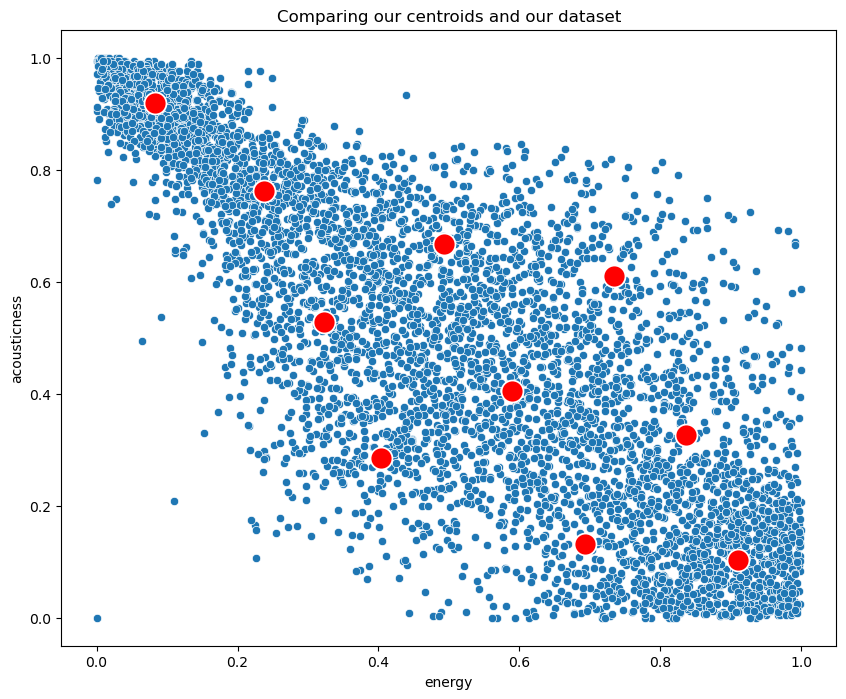

In [10]:
# Plot and explore our KMeans results

# First we plot with_age_quantile actualy scaled date with Quantile Transformer

fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(with_age_quantile)
plot_data.columns = ["energy","acousticness"]

# Second we plot centroids cl_pos within our plot moosic_1000songs_df_norm

plt.title('Comparing our centroids and our dataset')
plt.xlabel('energy')
plt.ylabel('acousticness')
sns.scatterplot(data=plot_data, x='energy', y='acousticness')
sns.scatterplot(data=cl_pos, x='energy', y='acousticness', color='red', s=250)
plt.show()

# Ways to find the right number of cluster, using inertia

In [11]:
kmeans.inertia_

48.7471601182611

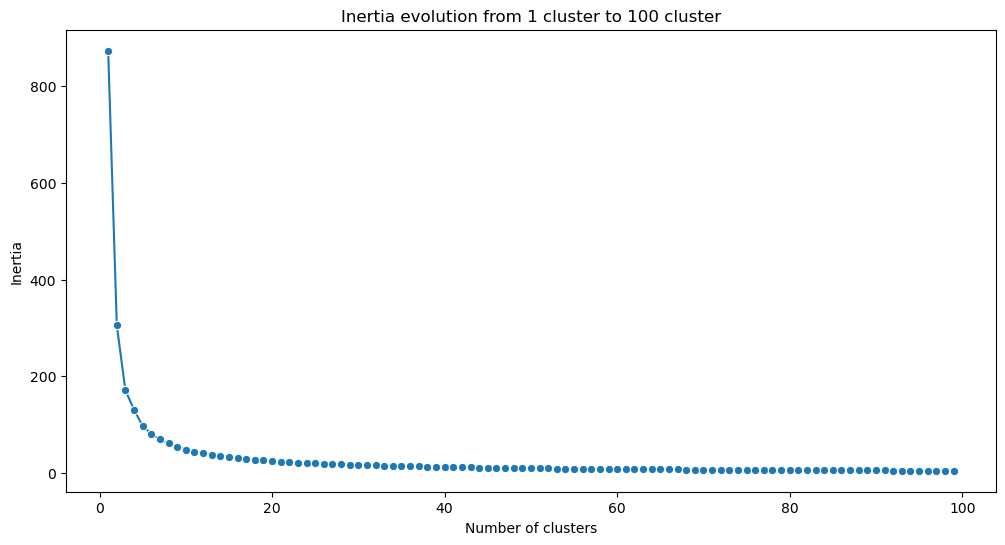

In [12]:
# Increasing the max_k = 100 shows that optimal number of clusters is 10

max_k = 100
inertia = []

for k in range(1, max_k):
    inertia.append(KMeans(n_clusters=k).fit(with_age_quantile).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()